Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Loading Dataset

In [ ]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00325/Sensorless_drive_diagnosis.txt"
data = pd.read_csv(url, sep=" ", header=None)

Splitting into Training and Testing data

In [ ]:
# Split the features and target variable
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the data

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Knn Model

In [ ]:
# Define the KNN model
knn = KNeighborsClassifier()


Perform Grid Search

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

# Perform grid search with 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [13],
    'weights': ['uniform'],
    'algorithm': ['ball_tree'],
    'leaf_size': [50],
    'p': [1, 2]
}

# Perform grid search with 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [50],
                         'n_neighbors': [13], 'p': [1, 2],
                         'weights': ['uniform']},
             scoring='accuracy')

Best parameters for grid search

In [ ]:
# Print the best parameters and accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameters:  {'algorithm': 'ball_tree', 'leaf_size': 50, 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
Best accuracy:  0.98025931342744


Random Search

In [ ]:
param_grid = {
    'n_neighbors': [9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],
    'p': [1, 2]
}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform random search with 10-fold cross-validation
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, n_iter=50)
random_search.fit(X_train, y_train)

In [ ]:
param_grid = {
    'n_neighbors': [13],
    'weights': ['uniform'],
    'algorithm': ['kd_tree'],
    'leaf_size': [30, 40],
    'p': [1, 2]
}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform random search with 10-fold cross-validation
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, n_iter=50)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['kd_tree'],
                                        'leaf_size': [30, 40],
                                        'n_neighbors': [13], 'p': [1, 2],
                                        'weights': ['uniform']},
                   scoring='accuracy')

Best parameters for random search

In [ ]:
# Print the best parameters and accuracy
print("Best parameters: ", random_search.best_params_)
print("Best accuracy: ", random_search.best_score_)

Best parameters:  {'weights': 'uniform', 'p': 1, 'n_neighbors': 13, 'leaf_size': 30, 'algorithm': 'kd_tree'}
Best accuracy:  0.98025931342744


Training model with best parameters and making predictions

In [ ]:
# Train the KNN model with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=13, weights='uniform', algorithm='ball_tree', leaf_size=50, p=1)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

Evaluating accuracy

In [ ]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9811143394291574


Confusion Matrix

[[1039    0    1    0    1   32    0    0    1    0    0]
 [   0 1064    0    0    0    0    0    0    1   24    0]
 [   1    0 1039    1    1    1    0    0    0    1    0]
 [   0    0    3 1038    5    0    0    2    0    0    0]
 [   0    0    6    9 1032    2    0   17    0    0    0]
 [  11    0    0    0    8 1034    0    0    4    0    0]
 [   0    0    0    0    0    0 1103    0    0    0    0]
 [   0    0    0   10   13    6    0  998    2    0    0]
 [   1    5    0    1    2   16    0    2  985    0    0]
 [   0   30    0    0    0    0    0    0    0 1041    1]
 [   0    0    0    0    0    0    0    0    0    0 1108]]


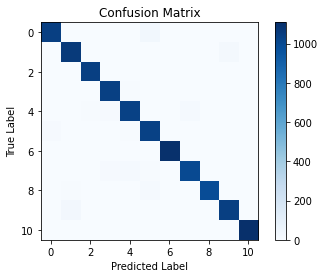

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()